<a href="https://colab.research.google.com/github/ghadfield32/Deep_learning/blob/main/pytorch_LR_train_valid_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn
from torch.optim.lr_scheduler import StepLR

# Generating the dataset
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


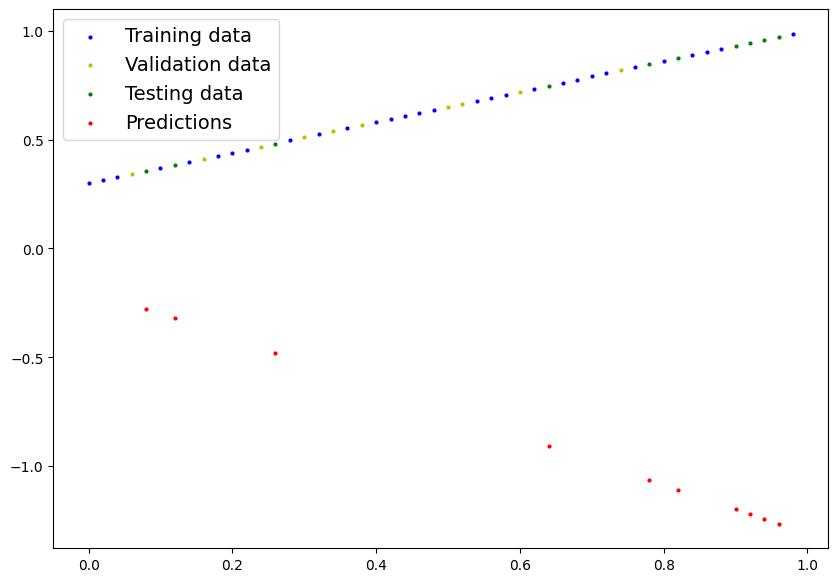

In [ ]:
# Plotting before NN to see before/after
def plot_predictions(train_data=X_train, train_labels=y_train, val_data=X_val, val_labels=y_val, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(val_data, val_labels, c="y", s=4, label="Validation data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

#create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

#Predictions in inference_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)


In [ ]:
epochs = 100

train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Validation
    model_0.eval()
    with torch.inference_mode():
        y_val_pred = model_0(X_val)
        val_loss = loss_fn(y_val_pred, y_val)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item()} | Val Loss: {val_loss.item()}")
        print(model_0.state_dict())
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())


Epoch: 0 | Train Loss: 0.34364157915115356 | Val Loss: 0.296861469745636
OrderedDict([('weights', tensor([0.3467])), ('bias', tensor([0.1388]))])
Epoch: 10 | Train Loss: 0.19617487490177155 | Val Loss: 0.15846148133277893
OrderedDict([('weights', tensor([0.4467])), ('bias', tensor([0.2388]))])
Epoch: 20 | Train Loss: 0.055350709706544876 | Val Loss: 0.029641443863511086
OrderedDict([('weights', tensor([0.5466])), ('bias', tensor([0.3379]))])
Epoch: 30 | Train Loss: 0.048287246376276016 | Val Loss: 0.056031644344329834
OrderedDict([('weights', tensor([0.6147])), ('bias', tensor([0.3888]))])
Epoch: 40 | Train Loss: 0.042708832770586014 | Val Loss: 0.049602799117565155
OrderedDict([('weights', tensor([0.6110])), ('bias', tensor([0.3838]))])
Epoch: 50 | Train Loss: 0.033271897584199905 | Val Loss: 0.03847002238035202
OrderedDict([('weights', tensor([0.6038])), ('bias', tensor([0.3754]))])
Epoch: 60 | Train Loss: 0.027958620339632034 | Val Loss: 0.030572136864066124
OrderedDict([('weights',

In [ ]:
# Testing
model_0.eval()
with torch.inference_mode():
    y_test_pred = model_0(X_test)
    test_loss = loss_fn(y_test_pred, y_test)

print(f"\nFinal Test Loss: {test_loss.item()}")



Final Test Loss: 0.029619187116622925


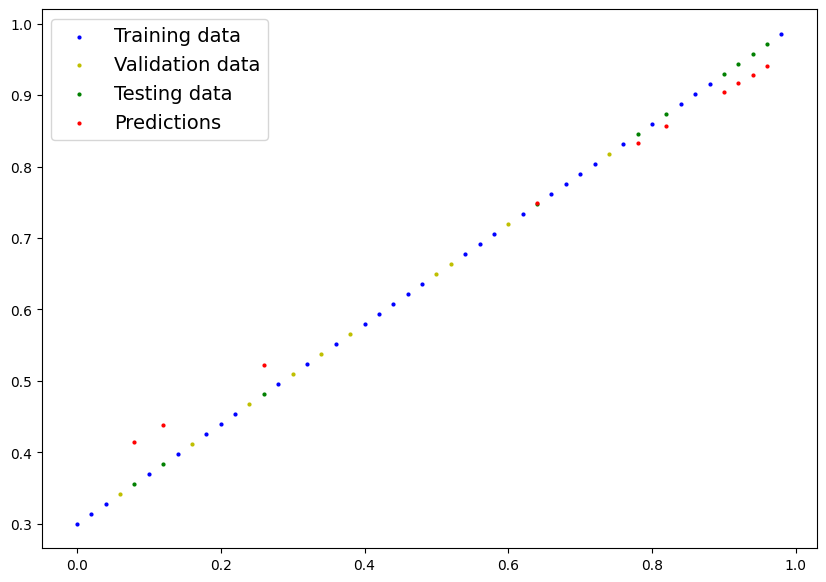

In [ ]:
# Plotting
def plot_predictions(train_data=X_train, train_labels=y_train, val_data=X_val, val_labels=y_val, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(val_data, val_labels, c="y", s=4, label="Validation data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

plot_predictions(predictions=y_test_pred)

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5983])), ('bias', tensor([0.3664]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


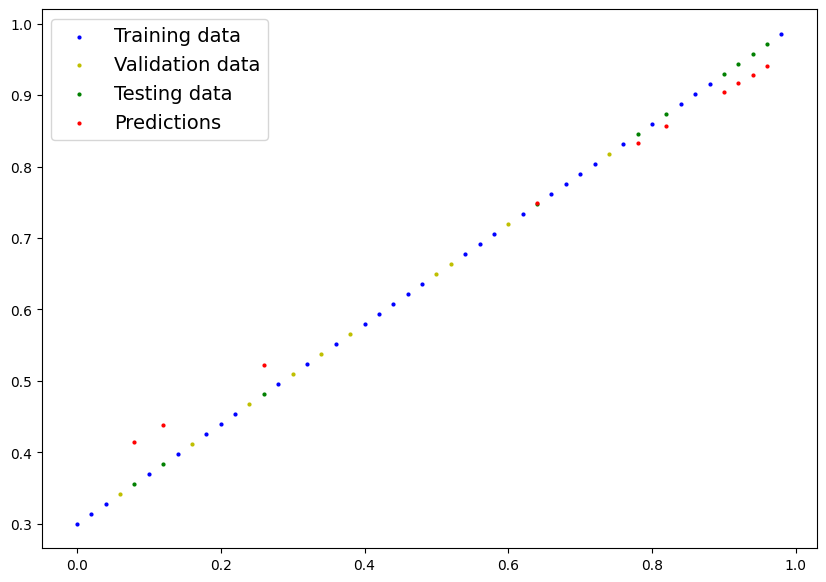

In [ ]:
# **Making predictions with a trained PyTorch model (inference):
#the steps to do it outside of the training/testing loop are similar.

#1    Set the model in evaluation mode (model.eval()).
#2    Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
#3    All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

plot_predictions(predictions=y_preds)

In [ ]:
#**Saving a Model:  PyTorch model's state_dict()
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

#Could also Save to Google Drive if we want to reuse

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
#**Loading a saved PyTorch model's state_dict()
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>